# Gas Sensor Heater Test

[![Open In Colab <](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ShawnHymel/ai-nose/blob/master/gas-sensor-heater-test.ipynb)

Upload gas and temperature data to */content/dataset*. Run through the cells to see how the preheating cycle can affect readings.

In [ ]:
import csv
import os

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### Settings
DATASET_PATH = "/content/dataset"

In [ ]:
### Read in .csv files to construct one long multi-axis, time series data

# Where we store the header info and raw data
header = None
raw_data = []

# Read each CSV file
for filename in os.listdir(DATASET_PATH):
  filepath = os.path.join(DATASET_PATH, filename)
  with open(filepath) as f:
      csv_reader = csv.reader(f, delimiter=',')

      # Read each line
      for line_count, line in enumerate(csv_reader):

        # Record first header and make sure subsequent headers match
        if line_count == 0:
          if header == None:
            header = line
          elif header != line:
            print("Error: Headers do not match. Skipping file.")
            continue

        # Construct raw data array, make sure number of elements match number of header labels
        else:
          if len(line) == len(header):
            raw_data.append(line)
          else:
            print("Error: Data length does not match header length. Skipping line.")
            continue

# Convert our raw data into a numpy array
raw_data = np.array(raw_data).astype(float)

Text(0, 0.5, 'Raw CO (V)')

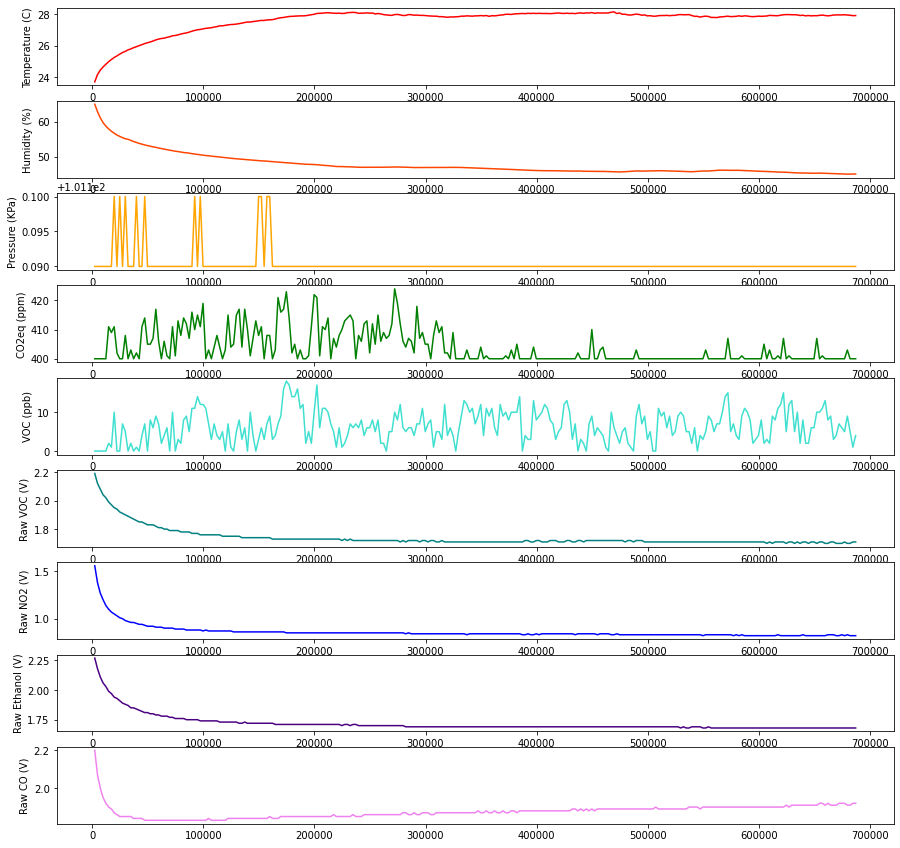

In [ ]:
### Plot the raw data

data_step = 10

# Sort the array based on the first column (time)
sorted_data = raw_data[raw_data[:,0].argsort()]

# Pull out time data
t = sorted_data[::data_step, 0]

# Pull out BME680 data
temp = sorted_data[::data_step, 1]
humd = sorted_data[::data_step, 2]
press = sorted_data[::data_step, 3]

# Pull out SGP30 data
co2 = sorted_data[::data_step, 4]
voc1 = sorted_data[::data_step, 5]

# Pull out multichannel gas data
voc2 = sorted_data[::data_step, 6]
no2 = sorted_data[::data_step, 7]
eth = sorted_data[::data_step, 8]
co = sorted_data[::data_step, 9]

# Create BME680 plots
fig, axs = plt.subplots(9, figsize=(15, 15))
axs[0].plot(t, temp, color='red')
axs[0].set_ylabel("Temperature (C)")
axs[1].plot(t, humd, color='orangered')
axs[1].set_ylabel("Humidity (%)")
axs[2].plot(t, press, color='orange')
axs[2].set_ylabel("Pressure (KPa)")

# Create SGP30 plots
axs[3].plot(t, co2, color='green')
axs[3].set_ylabel("CO2eq (ppm)")
axs[4].plot(t, voc1, color='turquoise')
axs[4].set_ylabel("VOC (ppb)")

# Create multichannel gas plots
axs[5].plot(t, voc2, color='teal')
axs[5].set_ylabel("Raw VOC (V)")
axs[6].plot(t, no2, color='blue')
axs[6].set_ylabel("Raw NO2 (V)")
axs[7].plot(t, eth, color='indigo')
axs[7].set_ylabel("Raw Ethanol (V)")
axs[8].plot(t, co, color='violet')
axs[8].set_ylabel("Raw CO (V)")